In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np


In [14]:
# Load the dataset
file_path = 'ts4.csv'
data = pd.read_csv(file_path)

# Drop unnecessary columns (e.g., 'Unnamed: 0')
data_cleaned = data.drop(columns=['Unnamed: 0'])

# Rename the column for clarity (optional)
data_cleaned.columns = ['Value']

# Display the first few rows
print(data_cleaned.head())


        Value
0  281.130005
1  284.000000
2  279.266663
3  286.246674
4  285.000000


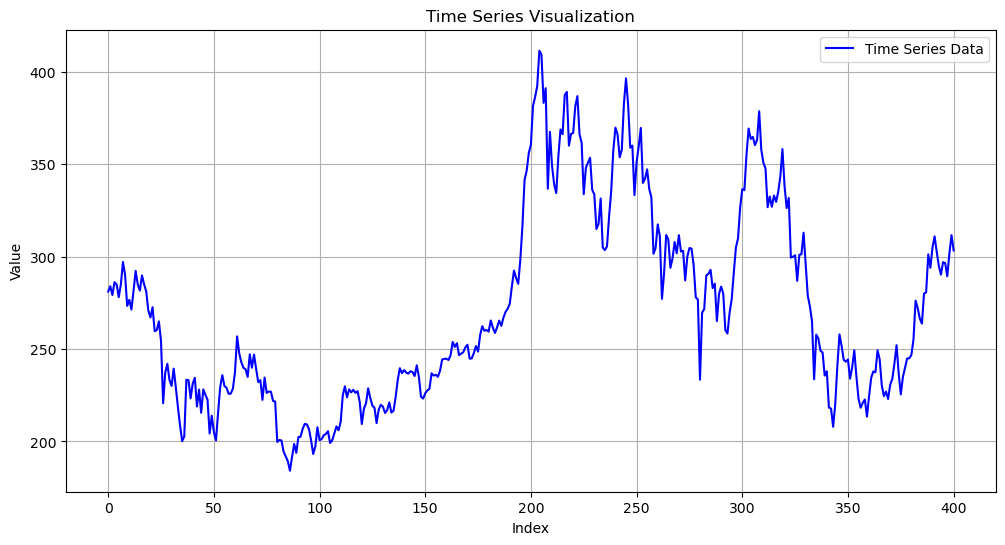

In [15]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned, label='Time Series Data', color='blue')
plt.title('Time Series Visualization')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


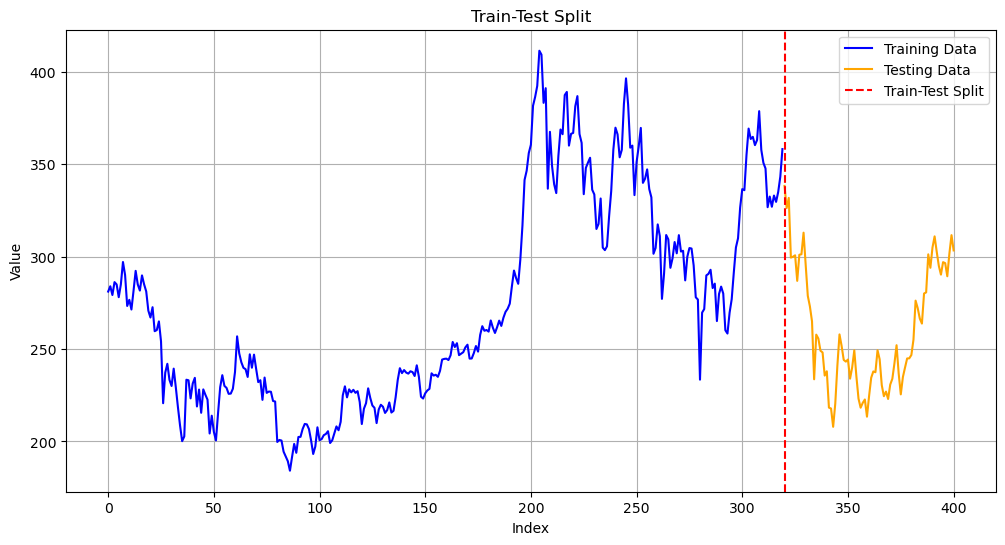

In [16]:
# Split the data into 80% training and 20% testing
split_ratio = 0.8
split_index = int(len(data_cleaned) * split_ratio)

train_data = data_cleaned.iloc[:split_index]
test_data = data_cleaned.iloc[split_index:]

# Plot train and test split
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data, label='Testing Data', color='orange')
plt.axvline(x=split_index, color='red', linestyle='--', label='Train-Test Split')
plt.title('Train-Test Split')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


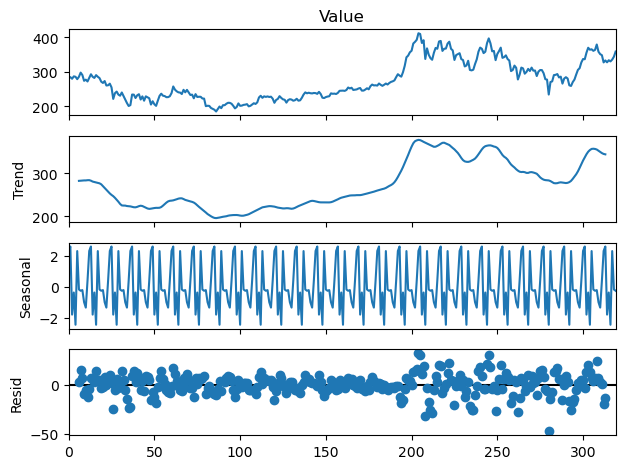

In [17]:
# Decompose the training data to analyze components
decomposition = seasonal_decompose(train_data['Value'], model='additive', period=12)  # Assuming monthly seasonality

# Plot decomposition
decomposition.plot()
plt.show()


In [18]:
# Fit an ARIMA model
# Choose ARIMA(p, d, q) - Parameters can be tuned based on ACF/PACF plots or grid search
model = ARIMA(train_data['Value'], order=(2, 1, 2))  # Example parameters (p=2, d=1, q=2)
arima_model = model.fit()

# Print model summary
print(arima_model.summary())


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  320
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1223.816
Date:                Mon, 18 Nov 2024   AIC                           2457.631
Time:                        16:49:03   BIC                           2476.457
Sample:                             0   HQIC                          2465.150
                                - 320                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1845      1.395     -0.132      0.895      -2.918       2.549
ar.L2          0.3828      0.812      0.471      0.638      -1.210       1.975
ma.L1          0.1005      1.386      0.073      0.9

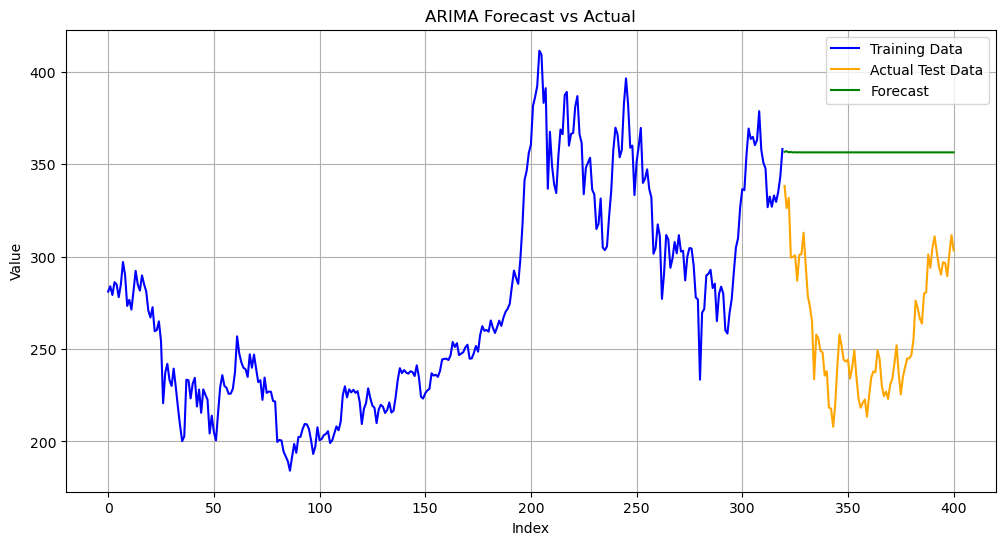

In [19]:
# Forecast for the test period
forecast = arima_model.forecast(steps=len(test_data))

# Convert forecast to DataFrame for visualization
forecast_index = test_data.index
forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_index)

# Plot the forecast vs actual values
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data, label='Actual Test Data', color='orange')
plt.plot(forecast_df, label='Forecast', color='green')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(test_data['Value'], forecast)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Mean Squared Error (MSE): 10286.7774
Root Mean Squared Error (RMSE): 101.4238


In [21]:
# Save forecast and actual values to CSV for further analysis
results = pd.DataFrame({
    'Actual': test_data['Value'],
    'Forecast': forecast
})
results.to_csv('forecast_results.csv', index=False)
